## Simple Linear Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_csv('/content/sample_data/height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

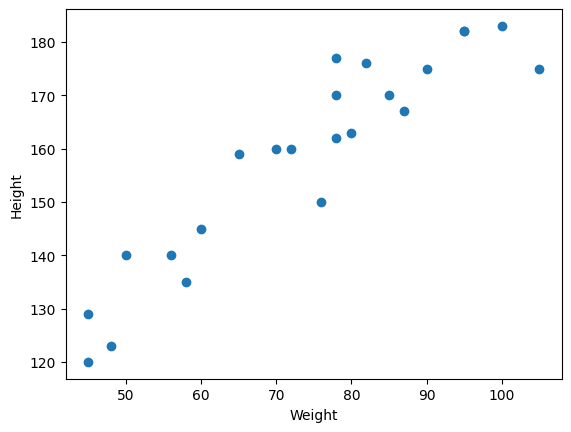

In [3]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Weight  23 non-null     int64
 1   Height  23 non-null     int64
dtypes: int64(2)
memory usage: 496.0 bytes


In [5]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


In [6]:
df.isnull().sum()

Weight    0
Height    0
dtype: int64

In [10]:
## divvide our dataset into independent and dependent features
X=df[['Weight']] ## idnependent feature
# Column that's why 2 square brackets
y=df['Height'] ## dependent features
# Series that's why 1 bracket

In [11]:
X.shape,y.shape

((23, 1), (23,))

In [13]:
# Divide dataset into train and test datasets so we need to call train_test_split library
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
# Here, we are giving 20% of the samples to test set

In [15]:
X_train.shape, X_test.shape

((18, 1), (5, 1))

In [16]:
y_train.shape,y_test.shape

((18,), (5,))

In [17]:
# We need to use Standard scaling for Linear Regression purposes
# to compute Cost function or error or to minimize the error by sampling down using standard scaling method
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [19]:
X_train = scaler.fit_transform(X_train)

In [20]:
X_test = scaler.transform(X_test)

In [21]:
X_test

array([[ 0.21043706],
       [ 0.21043706],
       [-1.6552288 ],
       [ 1.17153765],
       [-0.52452222]])

In [22]:
X_train

array([[ 1.73689094],
       [-0.92026952],
       [ 1.4542143 ],
       [ 0.21043706],
       [-1.48562281],
       [ 1.17153765],
       [-1.6552288 ],
       [-0.80719886],
       [-0.24184557],
       [ 0.0973664 ],
       [-1.37255215],
       [-1.03334018],
       [-0.12877492],
       [ 0.88886101],
       [ 0.43657837],
       [ 0.60618436],
       [ 0.71925502],
       [ 0.32350772]])

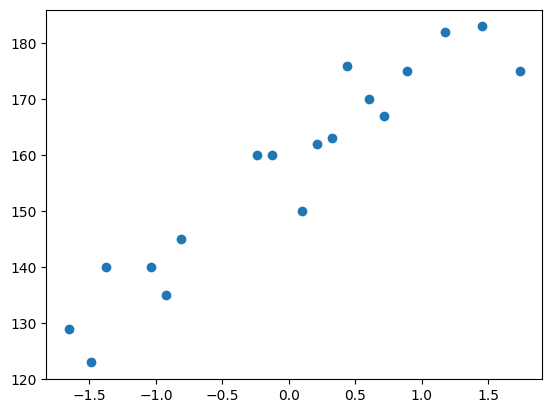

In [23]:
plt.scatter(X_train, y_train)

Now we can see the X axis has scaled down from 50 to 100 (in previous graph) to -1.5 to 1.5 (this above graph)

In [28]:
# Let's say we got new data point say 80
scaler.transform([[80]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [25]:
scaler.transform([[70]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.24184557]])

In [26]:
## Model Training

from sklearn.linear_model import LinearRegression

In [33]:
regressor = LinearRegression() # Empty parenthesis means it will take entire
# class sklearn.linear_model.LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False) by defaultly

In [35]:
## Training the train data
regressor.fit(X_train, y_train)

LinearRegression()

In [36]:
regressor.intercept_

157.5

In [37]:
regressor.coef_

array([17.03440872])

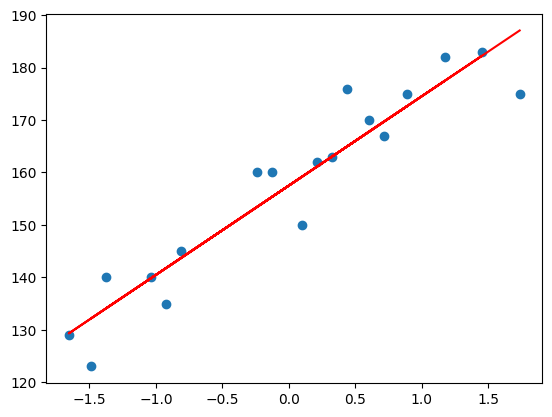

In [39]:
## Checking the best fit line on a 2D plane
plt.scatter(X_train, y_train)
plt.plot(X_train,regressor.predict(X_train),'r')

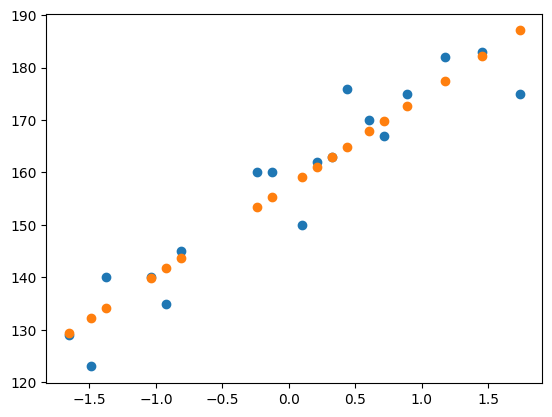

In [41]:
## Checking the best fit line on a 2D plane
plt.scatter(X_train, y_train)
plt.scatter(X_train,regressor.predict(X_train))

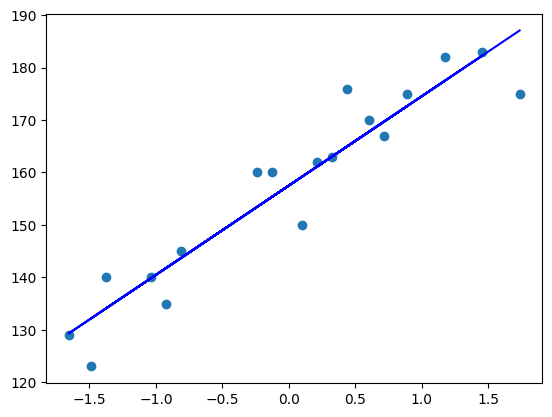

In [42]:
## Checking the best fit line on a 2D plane
plt.scatter(X_train, y_train)
plt.plot(X_train,regressor.predict(X_train),'b')

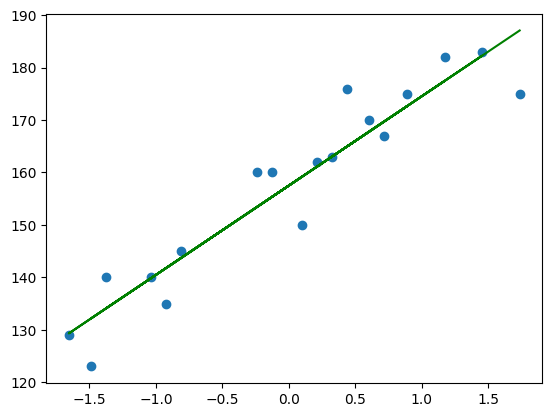

In [43]:
## Checking the best fit line on a 2D plane
plt.scatter(X_train, y_train)
plt.plot(X_train,regressor.predict(X_train),'g')

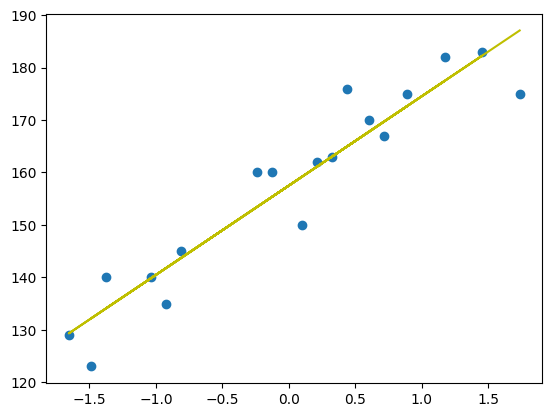

In [44]:
## Checking the best fit line on a 2D plane
plt.scatter(X_train, y_train)
plt.plot(X_train,regressor.predict(X_train),'y')

### prediction of train data
1. predicted height output = intercept + coef_(Weights)
2. y_pred_train = 157.5 + 17.03 * (X_train)
          
### prediction of test data
1. predicted height output = intercept + coef_(Weights)
2. y_pred_test = 157.5 + 17.03 * (X_test)

In [45]:
## Prediction for test data
y_pred_test = regressor.predict(X_test)

In [46]:
y_pred_test # These are my predicted values

array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

In [48]:
y_test # These are my actual values

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

## Performance Metrics MAE, MSE, RMSE

In [50]:
# Let's check errors
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [51]:
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


## Accuracy of the model R squared and Adjusted r ssquared
## R square 
Formula

**R^2 = 1 - SSR/SST**


- R^2	=	Accuracy of the model
- SSR	=	sum of squares of residuals
- SST	=	total sum of squares

In [52]:
from sklearn.metrics import r2_score

In [53]:
score = r2_score(y_test, y_pred_test)
score

0.776986986042344

So our accuracy of this model is nearly equal to 78%.

## Adjusted r square
**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

- R2: The R2 of the model
- n: The number of observations
- k: The number of predictor variables

In [54]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231252

In [55]:
scaler

StandardScaler()

In [56]:
regressor

LinearRegression()